In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#Since we need to change only one embarked value and we see that port S had the maximum count by 
#large range we will use S as our Port for NaN values.

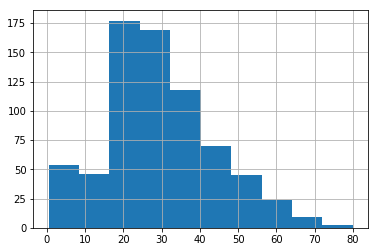

In [7]:
train["Age"].hist()

In [ ]:
# Age is right skewed so instead of mean we should use median.

In [8]:
print(train["Age"].median(skipna = True))
print(train["Age"].mean(skipna = True))

28.0
29.69911764705882


In [ ]:
#There are too many empty cabin values so we will drop that column.

In [9]:
train_XY = train.copy()
train_XY.drop("Cabin",axis = 1,inplace = True)
train_XY.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [10]:
train_XY["Age"].fillna(train["Age"].median(skipna = True),inplace = True)
train_XY.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
train_XY["Embarked"].fillna(train["Embarked"].value_counts().idxmax(),inplace = True)
train_XY.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#Both SibSp and Parch relate to travelling with family.
#combining the effect of these variables into one categorical predictor: 
#whether or not that individual was traveling alone.

In [12]:
train_XY["Alone"] = np.where((train_XY["SibSp"]+train_XY["Parch"])> 0,0,1)
train_XY.drop("SibSp",axis = 1,inplace = True)
train_XY.drop("Parch",axis = 1,inplace = True)
train_XY.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [ ]:
#We will remove Name & Ticket column because it will have no effect
#ans replace the strings in Sex,Embarked,Pclass with dummy columns

In [13]:
train_XY = pd.get_dummies(train_XY, columns=["Pclass","Embarked","Sex"])
train_XY.drop("Name",axis = 1,inplace = True)
train_XY.drop("Ticket",axis = 1,inplace = True)
train_XY.head()

,PassengerId,Survived,Age,Fare,Alone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,22.0,7.2500,0,0,0,1,0,0,1,0,1
1,2,1,38.0,71.2833,0,1,0,0,1,0,0,1,0
2,3,1,26.0,7.9250,1,0,0,1,0,0,1,1,0
3,4,1,35.0,53.1000,0,1,0,0,0,0,1,1,0
4,5,0,35.0,8.0500,1,0,0,1,0,0,1,0,1


In [ ]:
#Since sex female and sex male is telling us the same info in two different forms
#we will drop one of the cloumns

In [14]:
train_XY.drop("Sex_female",axis = 1,inplace = True)
train_XY.head()

,PassengerId,Survived,Age,Fare,Alone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,1,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,2,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,3,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,4,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,5,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [ ]:
#We will apply the same changes to the testing data.

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
test_XY = test.copy()
test_XY.drop("Cabin",axis = 1,inplace = True)
test_XY["Age"].fillna(train["Age"].median(skipna = True),inplace = True)
test_XY["Embarked"].fillna(train["Embarked"].value_counts().idxmax(),inplace = True)
test_XY["Alone"] = np.where((test_XY["SibSp"]+test_XY["Parch"])> 0,0,1)
test_XY.drop("SibSp",axis = 1,inplace = True)
test_XY.drop("Parch",axis = 1,inplace = True)
test_XY = pd.get_dummies(test_XY, columns=["Pclass","Embarked","Sex"])
test_XY.drop("Name",axis = 1,inplace = True)
test_XY.drop("Ticket",axis = 1,inplace = True)
test_XY.drop("Sex_female",axis = 1,inplace = True)
test_XY.head()

,PassengerId,Age,Fare,Alone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,892,34.5,7.8292,1,0,0,1,0,1,0,1
1,893,47.0,7.0000,0,0,0,1,0,0,1,0
2,894,62.0,9.6875,1,0,1,0,0,1,0,1
3,895,27.0,8.6625,1,0,0,1,0,0,1,1
4,896,22.0,12.2875,0,0,0,1,0,0,1,0


In [ ]:
#Plotting the graph we can see that being a minor increases your chances of survival.

In [17]:
train_XY['IsMinor']=np.where(train_XY['Age']<=16, 1, 0)
test_XY['IsMinor']=np.where(test_XY['Age']<=16, 1, 0)

In [18]:
cols = ["Age","Fare","Alone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X = train_XY[cols]
y = train_XY['Survived']

In [21]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

number of features: 8
Selected features: ['Age', 'Alone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


In [24]:
features = ['Age', 'Alone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']
X = train_XY[features]
X_test = test_XY[features]
Y = train_XY['Survived']
classifier = LogisticRegression()
classifier.fit(X,Y)
Y_pred = classifier.predict(X_test)

In [ ]:
classifier.score()

In [27]:
submission = pd.DataFrame({
        "PassengerId": test_XY["PassengerId"],
        "Survived": Y_pred
    })

submission.to_csv('test_result.csv', index=False)

In [28]:
data2 = pd.read_csv('test_result.csv')
data2.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
